In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

df = pd.read_json('../data/database-10-12.json')

#### Ändere die Spalte `ressort` zu einem Anfangsgroßbuchstaben

In [2]:
df.ressort = df.ressort.str.title()

#### Zähle die Anzahl pro Ressort

In [3]:
df = df.ressort.value_counts().reset_index(name="amount")
df['color'] = "#8ecae6" # BLUE
df['edgecolor'] = "#219ebc" # BLUE

## Balkendiagramm

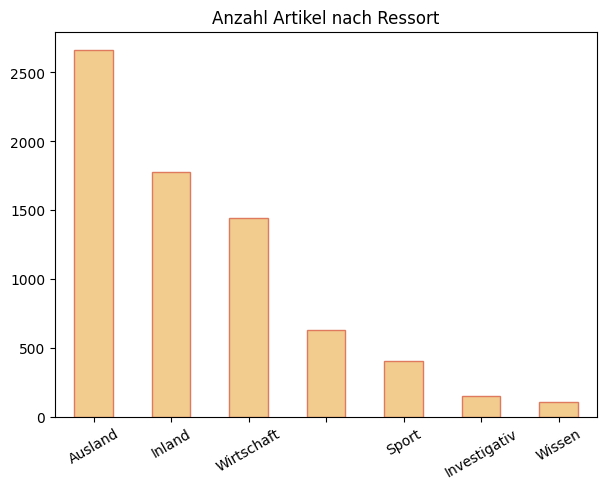

In [4]:
ax = df.plot(kind="bar", x="index", y="amount", figsize=(7,5), legend=False, rot=30, color="#f2cc8f", edgecolor='#e07a5f', title="Anzahl Artikel nach Ressort")
ax.axes.get_xaxis().get_label().set_visible(False)

ax.get_figure().savefig('figures/bar-ressorts.png', bbox_inches="tight")

#### Benenne das Feature `index` zu `ressort`

In [5]:
df['ressort'] = df['index']

#### Mache Abstufungen in den Farbintensitäten, indem Transparenzwerte angehangen werden

In [6]:
# transparent value from 100% - 10% * n; >34%
transparencies = ["FF", "E6", "CC",  "B3", "80",  "66", "4D"]
used = {"ressort": -1}

def highlight_color(row):
    used["ressort"] += 1
    row.color += transparencies[used['ressort']]
    return row
    
df = df.apply(highlight_color, axis=1)

## Tortendiagramm

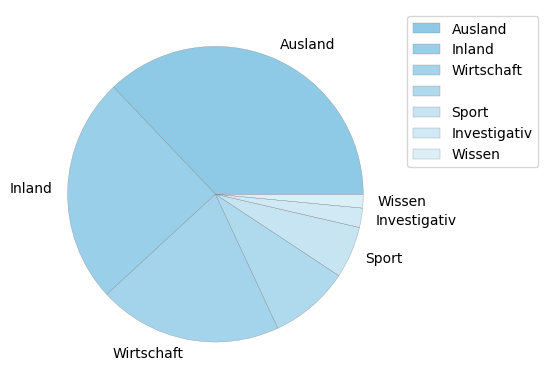

In [7]:
ax = df.plot(kind="pie", y="amount", labels=df.ressort, colors=df.color,  wedgeprops={"edgecolor": "grey", 'linewidth': 0.2, 'linestyle': 'solid', 'antialiased': True})

ax.axes.get_yaxis().get_label().set_visible(False)

ax.legend(labels=df.ressort, bbox_to_anchor=(1.0, 1.0))

ax.get_figure().savefig('figures/pie-ressort.png', bbox_inches="tight")